In [47]:
import pandas as pd
import zipfile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [48]:
zip_path = '../00_Data_Bases/Supermercado.zip' 
csv_filename = 'Supermercado.csv'

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)


In [49]:
df.shape

(2019501, 12)

In [50]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [51]:
week_days = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['day'] = df['order_dow'].map(week_days)

#### Key del Dataset
order_id – (A unique number to identity the order)

user_id - (A unique number to identify the user)

order_number – (Number of the order)

order_dow – (Day of the Week the order was made)

order_hour_of_day – (Time of the order)

days_since_prior_order - (History of the order)

product_id – (Id of the product)

add_to_cart_order – (Number of items added to cart)

reordered – (If the reorder took place)

department_id - (Unique number allocated to each department)

department – (Names of the departments)

product_name – (Name of the products)


https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023/code

#### Info basica DF

A continuacion se revisa la estructura general del dataset.

In [52]:
df.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients,Wednesday
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree,Wednesday
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter,Wednesday
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables,Wednesday
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables,Wednesday


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
 12  day                     object 
dtypes: float64(1), int64(9), object(3)
memory usage: 200.3+ MB


In [54]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2019501.00,2019501.00,2019501.00,2019501.00,2019501.00,1895159.00,2019501.00,2019501.00,2019501.00,2019501.00
mean,1707012.76,103067.27,17.15,2.74,13.44,11.39,71.21,8.36,0.59,9.93
std,985983.20,59491.17,17.53,2.09,4.24,8.97,38.21,7.15,0.49,6.28
min,10.00,2.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00
25%,852649.00,51584.00,5.00,1.00,10.00,5.00,31.00,3.00,0.00,4.00
50%,1705004.00,102690.00,11.00,3.00,13.00,8.00,83.00,6.00,1.00,9.00
75%,2559031.00,154600.00,24.00,5.00,16.00,15.00,107.00,11.00,1.00,16.00
max,3421080.00,206209.00,100.00,6.00,23.00,30.00,134.00,137.00,1.00,21.00


In [55]:
print(df.describe())

        order_id    user_id  order_number  order_dow  order_hour_of_day  \
count 2019501.00 2019501.00    2019501.00 2019501.00         2019501.00   
mean  1707012.76  103067.27         17.15       2.74              13.44   
std    985983.20   59491.17         17.53       2.09               4.24   
min        10.00       2.00          1.00       0.00               0.00   
25%    852649.00   51584.00          5.00       1.00              10.00   
50%   1705004.00  102690.00         11.00       3.00              13.00   
75%   2559031.00  154600.00         24.00       5.00              16.00   
max   3421080.00  206209.00        100.00       6.00              23.00   

       days_since_prior_order  product_id  add_to_cart_order  reordered  \
count              1895159.00  2019501.00         2019501.00 2019501.00   
mean                    11.39       71.21               8.36       0.59   
std                      8.97       38.21               7.15       0.49   
min                     

Se revisa si existe algun valor nulo dentro del dataset.

In [56]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
day                            0
dtype: int64

Dado que el objetivo es crear un aloritmo de clasificacion, se eliminan las filas nulas del dataset.

In [57]:
df = df.dropna()

Finalmente, se valida de que efectivamente se hayan eliminado los valores nulos.

In [58]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
day                       0
dtype: int64

Se valida de que no existan valores duplicados en el dataset.

In [59]:
df.duplicated().sum()

0

Se analiza la cantidad de valores únicos dentro del dataset.

In [60]:
df.nunique()

order_id                  187746
user_id                    98918
order_number                  99
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
day                            7
dtype: int64

Se realiza el conteo de ocurrencia de cada variable "department", de manera de obtener cuales son las categorías de producto más solicitadas.

In [61]:
department_counts = df['department'].value_counts()
product_name_counts = df['product_name'].value_counts()

print("Department counts:\n", department_counts)
print("\nProduct name counts:\n", product_name_counts)

Department counts:
 department
produce            553916
dairy eggs         316966
snacks             169855
beverages          158100
frozen             130049
pantry             108800
bakery              68430
canned goods        61844
deli                60934
dry goods pasta     50475
household           43239
breakfast           41733
meat seafood        41484
personal care       26154
babies              24633
international       15530
alcohol              8663
pets                 5622
missing              4608
other                2088
bulk                 2036
Name: count, dtype: int64

Product name counts:
 product_name
fresh fruits                  213224
fresh vegetables              199526
packaged vegetables fruits    103016
yogurt                         85176
packaged cheese                57683
                               ...  
kitchen supplies                 517
baby accessories                 476
baby bath body care              473
beauty                      

#### Ventas segun Dia y Momento del Dia

A continuación se procede a realizar el análisis de ventas considerando los diferentes días, horarios y combinaciones de ambos.

In [62]:
df.groupby('order_hour_of_day', as_index=False).agg({'user_id':'count'}).sort_values(by='user_id', ascending=False)

,order_hour_of_day,user_id
10,10,162876
11,11,159915
14,14,157495
15,15,156790
13,13,155976
12,12,153216
16,16,147884
9,9,141713
17,17,120847
8,8,101008


El ranking de compras por hora arroja que la mayor parte de las compras se centraliza en el horario que va desde las 10:00 hasta las 16:00. Siendo el horario de las 10:00 el que centraliza la mayor parte de compras realizadas.

A continuación se realiza el análisis de las compras por los diferentes días de la semana.

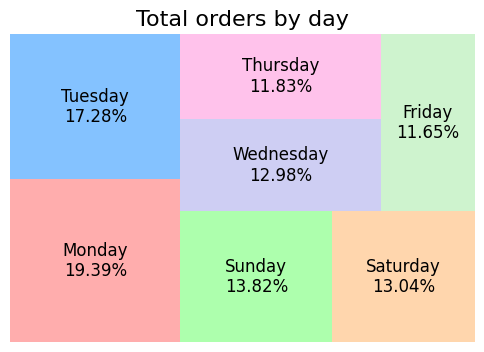

In [63]:
day_counts = df.groupby('day')['user_id'].count().sort_values(ascending=False)
day_percent = 100 * day_counts / day_counts.sum()

plt.figure(figsize=(6, 4))

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB3E6', '#C2F0C2']

squarify.plot(
    sizes=day_counts.values,
    label=[f"{day}\n{perc:.2f}%" for day, perc in zip(day_counts.index, day_percent)],
    alpha=0.8,
    color=colors,
    text_kwargs={'fontsize': 12}
)

plt.title('Total orders by day', fontsize=16)
plt.axis('off')
plt.show()

El gráfico muestra como los días lunes y martes son los que poseen mayor proporción de compras realizadas.

Con el objetivo de realizar una segmentación de horarios por parte del día, se procede a realizar un mapeo de horas, agrupandolas por los momentos: "Morning", "Afternoon", "Night" y "Down".

In [64]:
def order_time(x):
    if x in[6, 7, 8, 9, 10, 11, 12]:
        return 'Morning'
    if x in[13, 14, 15, 16, 17]:
        return 'Afternoon'
    if x in[18, 19, 20, 21, 22]:
        return 'Night'
    if x in[23, 24, 0, 1, 2, 3, 4, 5]:
        return 'Dawn'
    return x

Se almacena la el valor de momento del día en la variable "order_rime_list".

In [65]:
df['order_time_list']=df['order_hour_of_day'].apply(order_time)
df.sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day,order_time_list
1737083,1709485,179645,11,0,9,24.00,86,5,1,16,dairy eggs,eggs,Monday,Morning
1734729,2936926,26406,11,1,15,7.00,120,34,1,16,dairy eggs,yogurt,Tuesday,Afternoon
153689,1368051,157187,27,2,19,11.00,81,15,0,15,canned goods,canned jarred vegetables,Wednesday,Night
481772,644938,41117,2,1,10,8.00,83,4,0,4,produce,fresh vegetables,Tuesday,Morning
1439541,1959091,171019,11,3,15,30.00,24,16,1,4,produce,fresh fruits,Thursday,Afternoon


Graficamos la cantidad de ordenes segun el momento del día.

<Axes: title={'center': 'Order by Moment of the Day'}>

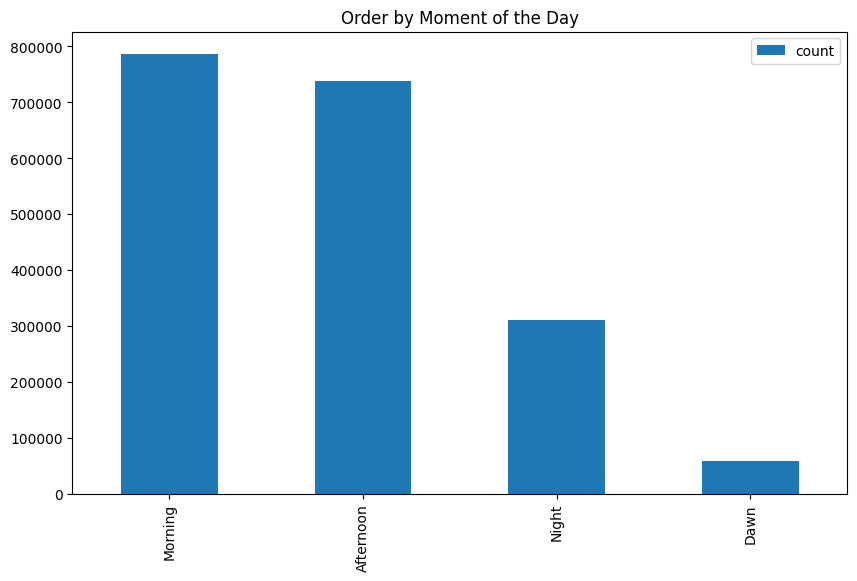

In [66]:
df.groupby('order_time_list')['user_id'].agg(['count']).sort_values(by='count', ascending=False).plot(
    kind='bar',
    title='Order by Moment of the Day',
    xlabel='',
    figsize=(10, 6)
)

Se realiza el análisis de la cantidad de ordenes agrupadas por momento del día, en los diferentes 7 días de la semana.

In [67]:
pivot_table = df.pivot_table(index='day', columns='order_time_list', values='user_id', aggfunc='count')

correct_order = ['Dawn', 'Morning', 'Afternoon', 'Night']

pivot_table = pivot_table[correct_order]

print(pivot_table)

order_time_list   Dawn  Morning  Afternoon  Night
day                                              
Friday            7674    86588      84014  42603
Monday           10696   147980     152295  56442
Saturday          8040   104181      95263  39657
Sunday            8887   106820     103458  42821
Thursday          6752    90650      88108  38718
Tuesday           8320   149268     121606  48256
Wednesday         7333   101837      94248  42644


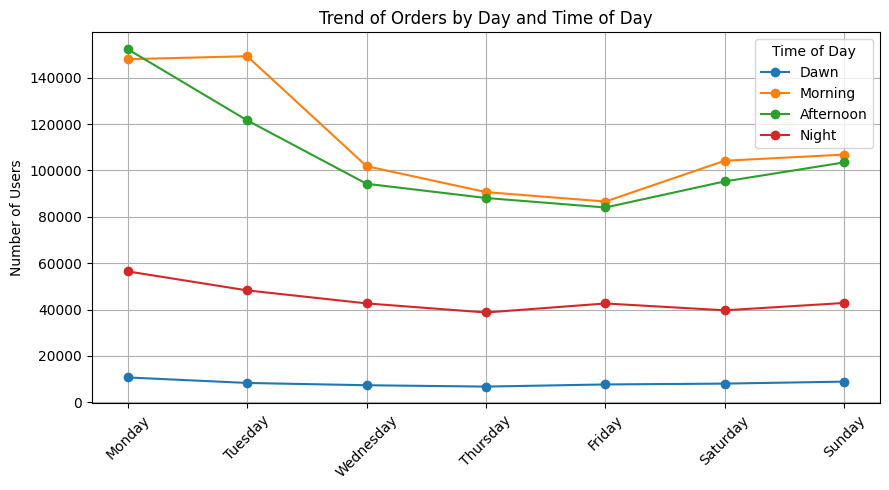

In [68]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot_table = pivot_table.reindex(days_order)

pivot_table.plot(
    kind='line',
    figsize=(9, 5),
    marker='o'
)

plt.title('Trend of Orders by Day and Time of Day')
plt.xlabel('')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

Se detecta que las tendencias de compra en la noche y la madrugada son relativamente estables, presentando una caida en el volumen de demanda desde el lunes hasta el jueves.

La mañana muestra un crecimiento de las compras desde el viernes que se mantiene hasta el martes, donde baja abruptamente estabilizandose hasta el viernes.

En el caso de la tarde, detectamos que este fenomeno es similar, con la diferencia de que el crecimiento en el volumen de compra se detiene el día lunes, donde baja abrupotamente hasta el viernes.

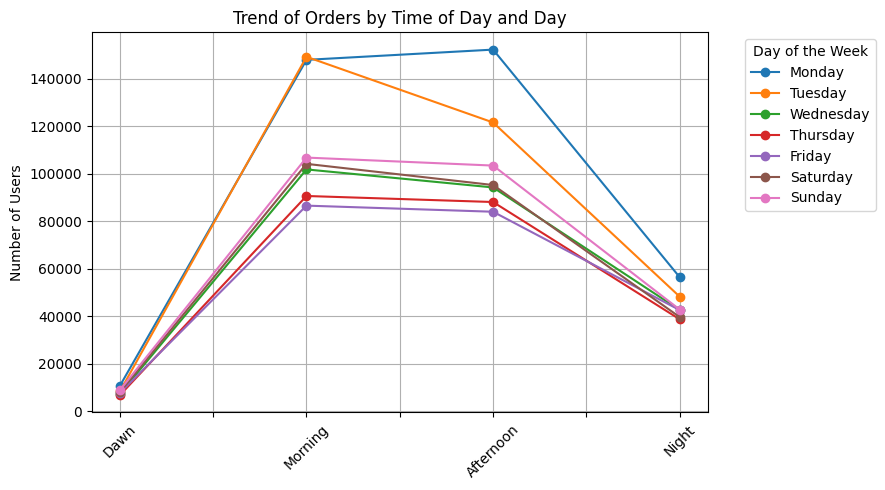

In [69]:
pivot_table_transposed = pivot_table.T

pivot_table_transposed.plot(
    kind='line',
    figsize=(9, 5),
    marker='o'
)

plt.title('Trend of Orders by Time of Day and Day')
plt.xlabel('')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(True)

plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Se encuentra que la mayor tendencia de compra se da entre la mañana y la tarde. Existe una gran tendencia de realizar compras los días lunes y martes; los lunes existe un pico de demanda por las tardes, y se detecta la particularidad de que los martes existe una caida significativa en el volumen de pedidos por las tardes a diferencia de en el resto de los días. 

A continuación se procede a realizar un análsis más exhaustivo de la cantidad de ordenes realizadas en las diferentes horas del día.

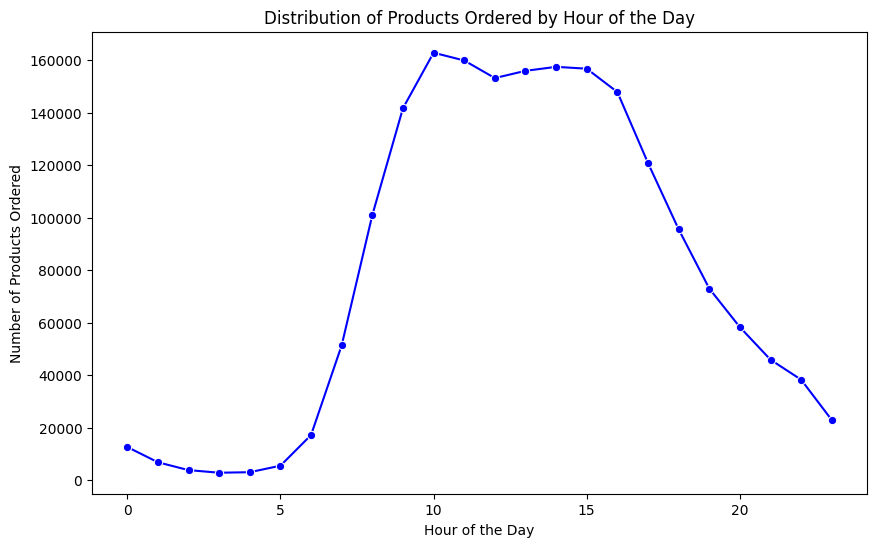

In [70]:
products_by_hour = df.groupby('order_hour_of_day')['product_id'].count().reset_index(name='order_count')

plt.figure(figsize=(10, 6))
sns.lineplot(x='order_hour_of_day', y='order_count', data=products_by_hour, marker='o', linestyle='-', color='b')

plt.title('Distribution of Products Ordered by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')

plt.show()

El gráfico muestra como existe un crecimiento en el volumen de compra desde las 5 AM, este fenomeno se mantiene de forma proporcional hasta las 10 AM, donde muestra un leve retroceso para estabilizarse hasta las 3 PM y comenzar a bajar de forma proporcionalmente inversa al crecimiento detectado al inicio del día.

Finalizando con el análisis de compras por hora, se incluye la variable de los diferentes días de la semana para añadir mayor información.

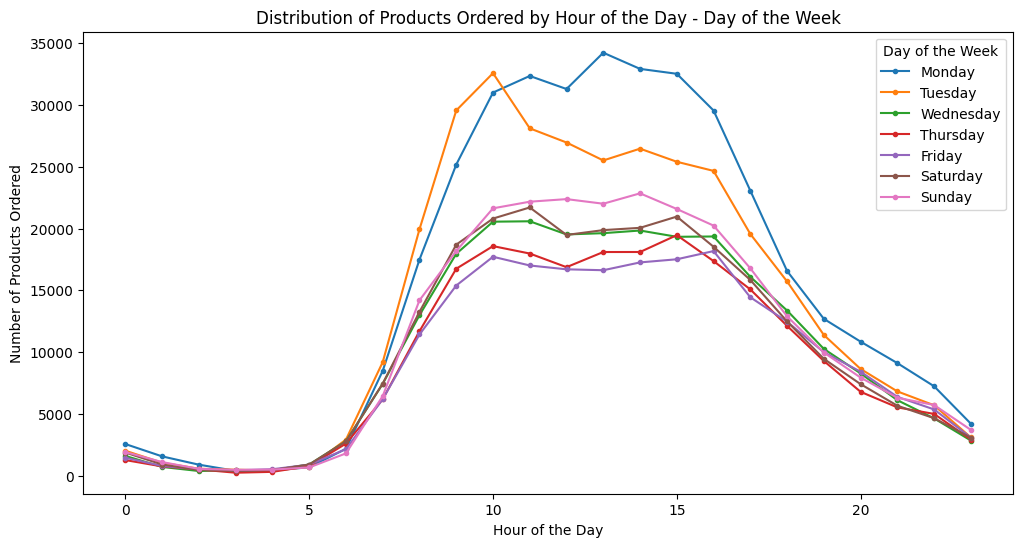

In [71]:
products_by_hour_dow = df.groupby(['day', 'order_hour_of_day']).size().unstack()

plt.figure(figsize=(12, 6))

dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in dias_semana: 
    plt.plot(products_by_hour_dow.loc[day], label=day, marker='o', markersize=3)

plt.title('Distribution of Products Ordered by Hour of the Day - Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.legend(title='Day of the Week', loc='upper right')

plt.show()

En este gráfico, se muestra de forma más clara el comportamiento diferenciado del día martes, donde se encuentra una reducción significativa en las compras realizadas a partir de las 10 AM.

En el resto de los días se encuentran comportamientos similares, particularmente se refleja como en los días lunes se realiza el mayor volumen de compras, y en los días viernes el menor nivel de demanda.

#### Top 10 de Productos Vendidos

De manera de encontrar cuales son los productos más solicitados, se decide implementar un ranking de los 10 productos más vendidos.

In [72]:
Most_sold_product = df.groupby("product_name")[['add_to_cart_order']].sum().reset_index()
top_10_products = Most_sold_product.sort_values(ascending = False, by = 'add_to_cart_order').head(10)

In [73]:
top_10_products.columns
px.bar(top_10_products, x= 'product_name', y= 'add_to_cart_order',color = 'add_to_cart_order', color_continuous_scale=["gray", "skyblue" ,"blue"])

El gráfico muestra como existe una mayor concentración de compra en "fresh vegetables" y "fresh fruits", diferenciandose en volumen en más del doble por la categoría de productos siguiente que es "packaged vegetables fruits", mostrando un decrecimiento exponencial.

#### Productos mas Recomprados segun Departamento

A continuación se busca analizar el comportamiento de recompra de los diferentes productos ordenados por departamento.

In [74]:
value_counts = df['reordered'].value_counts()
percentage = df['reordered'].value_counts(normalize=True) * 100

result = pd.DataFrame({'Count': value_counts, 'Percentage': percentage})
print(result)


             Count  Percentage
reordered                     
1          1190986       62.84
0           704173       37.16


El 63% del dataset representa productos que ya fueron comprados por el cliente en algún momento.

<Axes: title={'center': 'Reordereds'}, ylabel='department'>

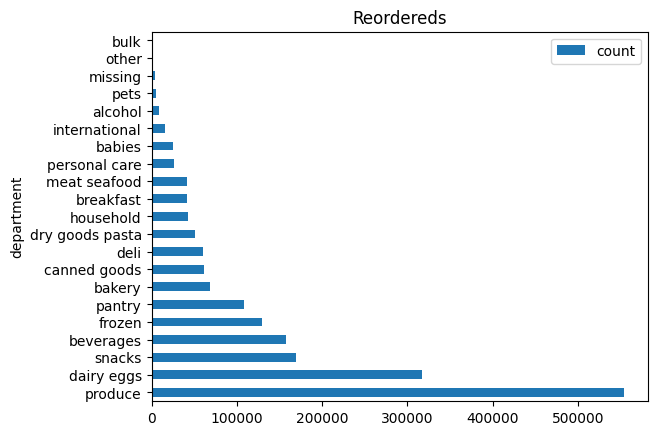

In [75]:
df.groupby('department')['reordered'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='barh', title='Reordereds')

El departamento que mayor nivel de recompra presenta es el de "produce" seguido por "dairy eggs".

#### Segmentacion de Clientes por Cantidad de Ordenes

Se maneja la hipótesis de que el comportamiento de los clientes varia según la cantidad de ordenes o compras que realizan a lo largo del período de tiempo de análisis.
Por tal motivo, se plantea segmentar en grupos de clientes por cantidad de ordenes realizadas.

In [76]:
max_order_numbers = df.groupby('user_id')['order_number'].max().reset_index()
max_order_numbers.rename(columns={'order_number': 'max_order'}, inplace=True)

df = df.merge(max_order_numbers, on='user_id', how='left')

El enfoque que se plantea es el de generar 5 grupos de clientes según la cantidad de compras realizadas, comenzando con ordenes entre 1 y 20, y finalizando con el último grupo que posee clientes que realizaron entre 81 y 100 pedidos (siendo 100 el máximo de ordenes realizadas por clientes registradas en el dataset).

In [77]:
def order_number_group(x):
    if x <= 20:
        x = '1-20 order'
    elif x >20 and x <=40:
        x = '21-40 order'
    elif x >40 and x <=60:
        x = '41-60 order'
    elif x >60 and x <=80:
        x = '61-80 order'
    else:
        x = '81-100 order'
    return x

Luego de realizar el mapeo de grupos de clientes, se procede a almacenar la variable en la columna 'order_number_group'. 

In [78]:
df['order_number_group']=df['max_order'].apply(order_number_group)
df.sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day,order_time_list,max_order,order_number_group
1798666,3267988,10759,4,2,14,12.00,89,12,0,13,pantry,salad dressing toppings,Wednesday,Afternoon,4,1-20 order
1545020,2782493,58586,18,0,14,16.00,24,3,1,4,produce,fresh fruits,Monday,Afternoon,18,1-20 order
107445,1946723,102438,5,6,13,10.00,26,5,1,7,beverages,coffee,Sunday,Afternoon,5,1-20 order
383619,1653905,147318,24,4,20,9.00,86,6,1,16,dairy eggs,eggs,Friday,Night,26,21-40 order
1695647,2267970,108632,4,4,15,2.00,123,4,1,4,produce,packaged vegetables fruits,Friday,Afternoon,16,1-20 order


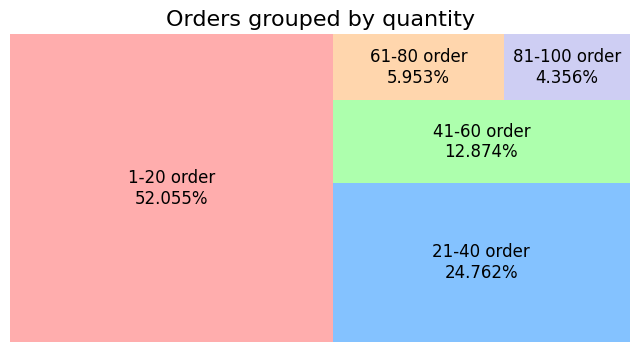

In [79]:
order_counts = df.groupby('order_number_group')['user_id'].count().sort_values(ascending=False)
order_percent = 100 * order_counts / order_counts.sum()

plt.figure(figsize=(8, 4))

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB3E6', '#C2F0C2']

squarify.plot(
    sizes=order_counts.values,
    label=[f"{group}\n{perc:.3f}%" for group, perc in zip(order_counts.index, order_percent)],
    alpha=0.8,
    color=colors,
    text_kwargs={'fontsize': 12}
)

plt.title('Orders grouped by quantity', fontsize=16)
plt.axis('off')
plt.show()

El treemap de la segmentación realizada muestra como más del 50% del dataset posee usuarios que realizaron entre 1 y 20 ordenes, siendo el segmento más pequeño del dataset el grupo de usuarios que realizaron entre 81 y 100 ordenes.

#### Correlacion

Se genera una copia del dataset para modificar y quitar variables, con el objetivo de hacer un análisis de correlación considerando solamente los inputs relevantes para el armado de los modelos.

In [80]:
df2 = df.copy()

##### Correlación variables numericas

Se divide el análisis de correlación analizando en primer lugar a las variables numéricas del dataset. Para poder utilizar las medidas generadas 'order_time_list' y 'order_number_group' se aplica la función factorize de pandas que asigna un valor numérico a cada valor diferente de cada variable.

In [81]:
df2['order_time_list'] = pd.factorize(df.order_time_list)[0]
df2['order_number_group'] = pd.factorize(df.order_number_group)[0]

Se quitan del análisis de correlación las variables que se entiende no deben considerarse por los siguientes motivos:

'order_id' y 'user_id': Son identificadores únicos para cada pedido o usuario. No incluyen información relevante para la correlación numérica ya que no aportan variabilidad explicativa.

'product_name', 'department' y 'day': ya están consideradas en las variables 'product_id', 'department_id' 'order_dow'.

'order_number': se sustituye por la variable 'max_order' que incluye el valor máximo de ordenes realizadas por el usuario.

In [82]:
df2 = df2.drop(['order_id', 'user_id', "product_name", "department", "order_number", "day"], axis=1)

Se realiza la corrlación de variables numéricas de forma tabular y de forma matricial. 
El formato tabular nos permite visualizar las correlaciones de forma numérica mas rapidamente. Lo complementamos con el análisis matricial para obtener una representación visual con mayor claridad. 

In [83]:
df2.corr()

,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,order_time_list,max_order,order_number_group
order_dow,1.00,0.01,-0.03,-0.00,-0.01,-0.01,0.00,0.02,0.02,0.01
order_hour_of_day,0.01,1.00,0.01,0.00,-0.02,-0.02,-0.01,0.30,-0.04,-0.00
days_since_prior_order,-0.03,0.01,1.00,0.01,0.05,-0.14,0.00,-0.01,-0.45,-0.02
product_id,-0.00,0.00,0.01,1.00,0.01,0.00,0.06,0.00,-0.00,0.00
add_to_cart_order,-0.01,-0.02,0.05,0.01,1.00,-0.15,0.03,-0.00,-0.01,-0.01
reordered,-0.01,-0.02,-0.14,0.00,-0.15,1.00,-0.04,0.00,0.22,-0.00
department_id,0.00,-0.01,0.00,0.06,0.03,-0.04,1.00,-0.00,0.00,0.00
order_time_list,0.02,0.30,-0.01,0.00,-0.00,0.00,-0.00,1.00,-0.01,-0.00
max_order,0.02,-0.04,-0.45,-0.00,-0.01,0.22,0.00,-0.01,1.00,0.14
order_number_group,0.01,-0.00,-0.02,0.00,-0.01,-0.00,0.00,-0.00,0.14,1.00


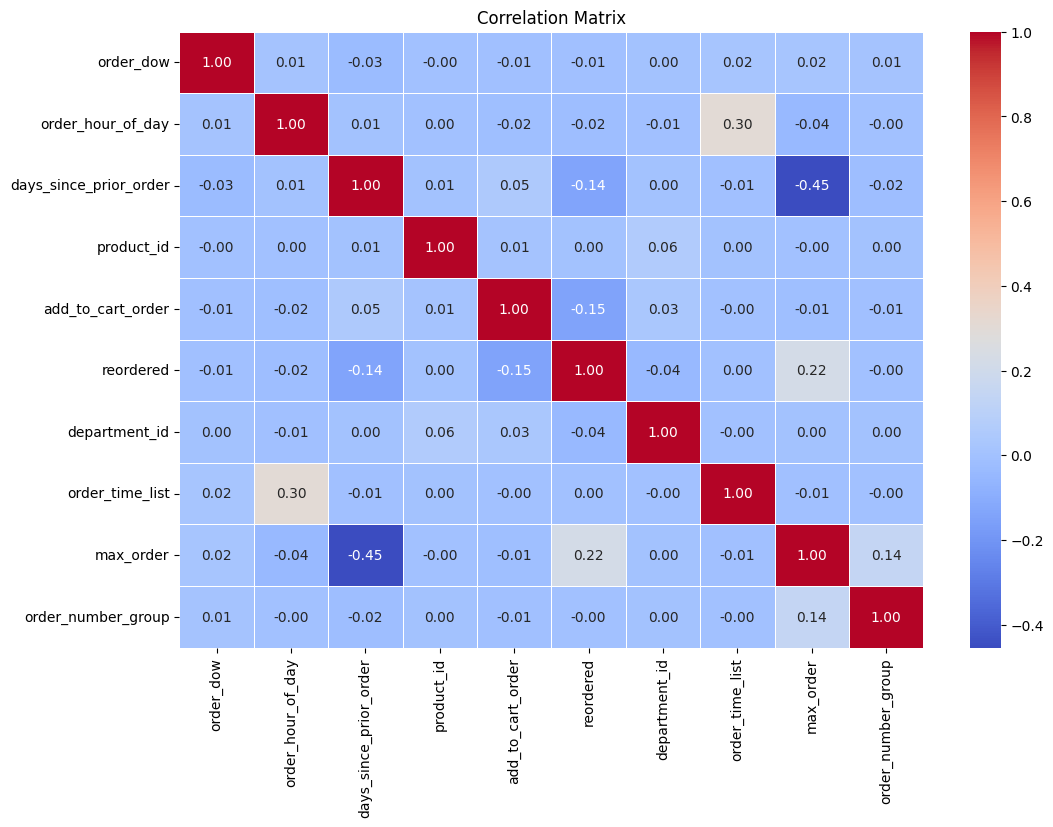

In [84]:
corr_matrix = df2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Luego de realizadas las correlaciones entre las variables numéricas podemos observar que el dataset no tiene relaciones lineales fuertes para la mayor parte de las variables analizadas, lo que nos indica que existe una independencia entre variables. 

Las varibles que tienen mayor correlación, son max_order y days_since_prior_order, con una correlación negativa, lo que nos indica que los usuarios que realizan mas cantidad de pedidos tienen menor tiempo de diferencia entre pedidos respecto a los usuarios que realizan menos cantidad de pedidos. En sí esta correlación es lógica y esperable. 

Las siguientes variables con alta correlacion son order_hour_of_day y order_time_list. Esta correlación es lógica ya que para crear la variable order_time_list utilizamos order_hour_of_day.

##### Correlación de variables categoricas

Para realizar el análisis de correlación entre variables categóricas no podemos utilizar relaciones lineales, por lo que empleamos Cramér's V, que es una medida basada en el chi-cuadrado, que nos permite cuantificar la relación entre dos variables categóricas.

In [85]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

categorical_columns = ['department', 'product_name', 'day', 'order_time_list', 'order_number_group']

cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

Luego de realizar los cálculos con el método de Cramer graficamos las correlaciones de forma matricial para obtener una visualización sencilla de las correlaciones.

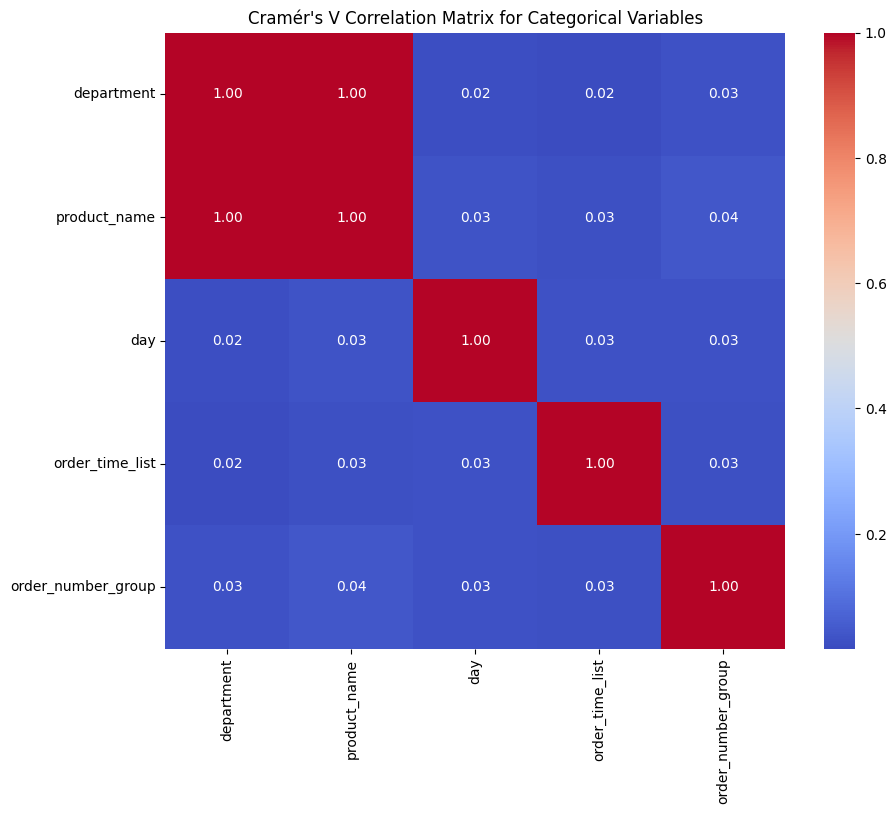

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Cramér's V Correlation Matrix for Categorical Variables")
plt.show()

Para el análisis de variables categóricas no se muestran correlaciones relevantes para ninguna de las variables. 
La única correlacion que figura es entre product_name y department, lo cual es lógico ya que department es una categoría que agrupa varios productos.

##### Pares de productos comprados juntos

Analizamos los productos que se compran de a pares con la finalidad de identificar y entender patrones de compra, lo que nos resultará de utilisad para realizar recomendaciones de productos. 

C:\Users\marti\AppData\Local\Temp\ipykernel_25428\1648073766.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




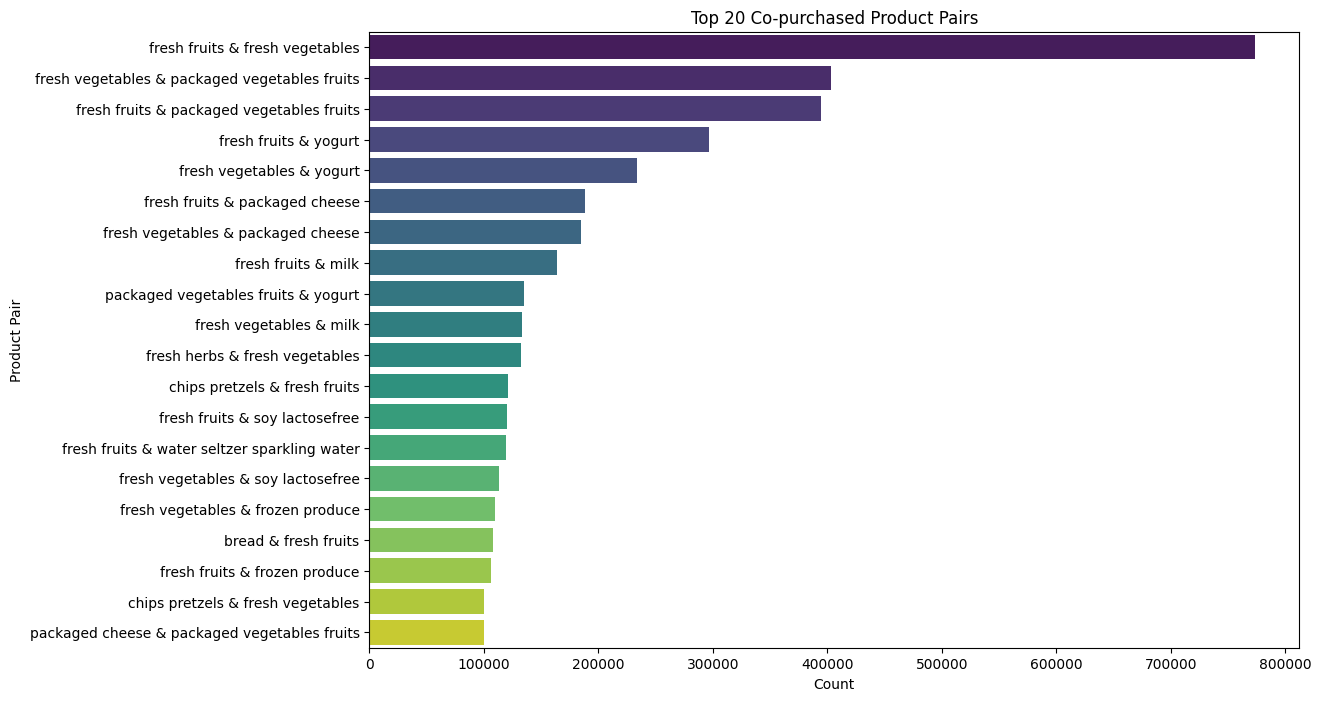

In [87]:
order_products = df[['order_id', 'product_name']]

merged_products = pd.merge(order_products, order_products, on='order_id')

co_purchased_products = merged_products[merged_products['product_name_x'] != merged_products['product_name_y']][['product_name_x', 'product_name_y']]

co_purchased_products['min_product'] = co_purchased_products[['product_name_x', 'product_name_y']].min(axis=1)
co_purchased_products['max_product'] = co_purchased_products[['product_name_x', 'product_name_y']].max(axis=1)

unique_pairs = co_purchased_products[['min_product', 'max_product']].value_counts().reset_index(name='count')

top_pairs = unique_pairs.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y=top_pairs['min_product'].astype(str) + ' & ' + top_pairs['max_product'].astype(str), data=top_pairs, palette='viridis')
plt.title('Top 20 Co-purchased Product Pairs')
plt.xlabel('Count')
plt.ylabel('Product Pair')
plt.show()

Del análisis gráfico de los 20 pares de productos más comprados en conjunto, podemos concluir que existe una preferencia clara de compra conjunta de productos. 
- fresh fruits & fresh vegetables es el par de productos que mas se compra en conjunto, seguido por fresh vegetables & packaged vegetables fruits y fresh fruits & packaged vegetables fruits, lo cual indica que los clientes tienen preferencias a realizar combinaciones de alimentos frescos y alimentos frescos con envasados en la misma compra, optando por compra de productos "similares".
- fresh fruits & yogurt y fresh vegetables & yogurt son los que siguen en el análisis, lo que nos indica una preferecnia por productos saludables. A su vez, estos productos son complementarios, al igual que las categorías packaged vegetables fruits & yogurt y fresh fruits & milk. 
- Luego vemos que cuando compran sncks lo complementan con productos saludables como para balancear la dieta, en combinaciones como chips pretzels & fresh fruits y chips pretzels & fresh vegetables.

Estos patrones de compra nos ayudan a identificar el comportamiento de los clientes para poder realizar recomendaciones. 

#### Outliers

Realizamos un análisis de outliers para identificar productos que tengan una frecuencia de compra muy alta o muy baja en comparación al resto de los productos. Esto nos serivirá para identificar que productos recomendar.

In [88]:
product_counts = df['product_name'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Bottom 5% of Products purchased:")
print(low_freq_products)

print("\Top 5% of Products purchased:")
print(high_freq_products)


Bottom 5% of Products purchased:
product_name
specialty wines champagnes    558
eye ear care                  550
kitchen supplies              517
baby accessories              476
baby bath body care           473
beauty                        354
frozen juice                  273
Name: count, dtype: int64
\Top 5% of Products purchased:
product_name
fresh fruits                     213224
fresh vegetables                 199526
packaged vegetables fruits       103016
yogurt                            85176
packaged cheese                   57683
milk                              52154
water seltzer sparkling water     49679
Name: count, dtype: int64


Del análisis de outliers de la frecuencia de productos comprados observamos que los productos con **menor** frecuencia de compra son vinos y champagnes especiales, productos de cuidado ocular, suministros de cocina, y accesorios para bebés. Lo que podría indicar que son productos de uso ocasional. Mientras que los productos con **mayor** frecuencia de compra son frutas frescas, vegetales frescos y frutas envasadas son los más comprados, seguidos por yogurt y queso envasado. Lo cual indica que hay alta demanda de alimentos frescos y básicos, esenciales para los consumidores.

Luego analizamos la frecuencia de compras por departamento para entender la popularidad de los diferentes departamentos en términos de la cantidad de productos comprados. Esto nos proporcionará una visión util para la recomendacion de productos.

In [89]:
product_counts = df['department'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Bottom 5% of purchases by Department:")
print(low_freq_products)

print("\nTop 5% of purchases by Department:")
print(high_freq_products)

Bottom 5% of purchases by Department:
department
other    2088
bulk     2036
Name: count, dtype: int64

Top 5% of purchases by Department:
department
produce       553916
dairy eggs    316966
Name: count, dtype: int64


Del análisis de outliers de la frecuencia de compras por departamento observamos que los departamentos con **menor** frecuencia de compra son "other" y "bulk" (2,036 compras). Lo cual sugiere que los productos de estas categorías  aquí no son de primera necesidad. Mientras que los departamentos con **mayor** frecuencia de compra son "produce" y "dairy eggs".

Para continuar con el analisis observamos los outliers de frecuencia de usuarios basado en el número de pedidos, lo que permitirá identificar el comportamiento de compra de los usuarios en términos de su actividad de compra, segmentando a los usuarios por cantidad de compras, entre clientes leales y clientes nuevos u ocasionales.

In [90]:
product_counts = df['max_order'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Bottom 5% users:")
print(low_freq_products)

print("\nTop 5% users:")
print(high_freq_products)

Bottom 5% users:
max_order
89     3491
92     3434
84     3201
100    3182
91     3181
Name: count, dtype: int64

Top 5% users:
max_order
4    79580
3    74245
5    73050
2    66885
6    65331
Name: count, dtype: int64


Del análisis realizado vemos que los usuarios con **menor** frecuencia de compra son mas que los usuarios con **mayor** frecuencia de compra. Quienes realizaron entre 89 y 100 pedidos, son usurios mas leales, sin embargo son al rededor de 3mil clientes por cantidad de compra. Los usuarios menos activos con compras de entre 2 y 6 pedidos realizados son mayores en cantidad respecto al grupo anterior, andan entre los 65mil y 80mil clientes. Esto nos indica que la mayor cantidad de clientes son los que realizan menos compras, los menos fieles.

Por ultimo, realizamos la busqueda de oultliers sobre las horas del día en las que se realizan los pedidos para poder identificar los momentos de menor y mayor actividad de compra.

In [91]:
product_counts = df['order_hour_of_day'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Bottom 5% of time of day with orders :")
print(low_freq_products)

print("\nTop 5% of time of day with orders:")
print(high_freq_products)

Bottom 5% of time of day with orders :
order_hour_of_day
4    3052
3    2856
Name: count, dtype: int64

Top 5% of time of day with orders:
order_hour_of_day
10    162876
11    159915
Name: count, dtype: int64


Los horarios con **menor** cantidad de compras son las 3 y 4hs de la madrugada, mientras que los horarios con **mayor** cantidad de compras son las 10 y 11 de la mañana, las cuales representan el pico de actividad de ventas realizadas. 

#### Se exporta el DF con los cambios realizados

In [93]:
df.to_csv('../00_Data_Bases/Supermercado_mod.csv', index=False)

zip_filename = '../00_Data_Bases/Supermercado_mod.zip'
csv_filename = '../00_Data_Bases/Supermercado_mod.csv'

with zipfile.ZipFile(zip_filename, 'w', compression=zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(csv_filename, arcname='Supermercado_mod.csv')